# Use model
I denne notebooken bruker jeg modellen som er lagd tidligere

In [1]:
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import matplotlib.pyplot as plt
import os
import plotly.express as px
import stockstats

from lib.rens import rens

In [56]:
def make_ready(filer):
    for i, fil in enumerate(filer):
        print(f"{i+1} av {len(filer)} renset" ,end='\r')
        data = cleanup.clean_data(pd.read_excel(fil))
        stock = stockstats.StockDataFrame.retype(data)
        indikatorer = ['rsi_20', 'trix', 'open_8_sma', 'open_16_sma', 'macds', 'open_30_sma']
        for ind in indikatorer:
            stock.get(ind)
        stock['sma8-16'] = [stock.open_8_sma[i] - stock.open_16_sma[i] for i, value in enumerate(stock.open_8_sma)]
        stock['sma30_derivert'] = [stock.open_30_sma[i] / stock.open_30_sma[i-1] if i>1 else 1 
                                   for i, value in enumerate(stock.open_30_sma)]

        evaluate_trades(stock)
    
    #return stock


def evaluate_trades(data):
    # data er en dag df
    score = 0
    scores = []
    indikatorer = ['rsi_20', 'trix', 'macds', 'sma8-16', 'sma30_derivert']
    highest = max(data['open'])
    lowest = min(data['open'])
    for ix, verdier in data.iterrows():
        
        indi_switch = [False]*len(indikatorer)
        for i, ind in enumerate(indikatorer):
            if model[ind]['upper'][score] > verdier[ind] > model[ind]['lower'][score]:
                indi_switch[i] = True
                
        if all(indi_switch):
            score += 1
        else:
            score = 0
            
        if score > 15:
            #kjøp
            scores.append(highest)
        else:
            scores.append(lowest)
        
        #print(score, indi_switch)
        
    data['forslag'] = scores
    #plt.plot(data['open'])
    #plt.plot(data['forslag'])
    #plt.show()
    fig = px.line(data, x='tid', y=['open', 'forslag'])
    fig.show()
    #return scores
        
    
    
    
def add_data(word):
    ordet = 'data/' + word
    return ordet

In [38]:
cleanup = rens()
model = pd.read_pickle('models/first_model.pkl')

In [58]:
filer = list(map(add_data, os.listdir('data/')))[:10] # 60 første er lagd til å bygge modell
make_ready(filer)
#fil


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


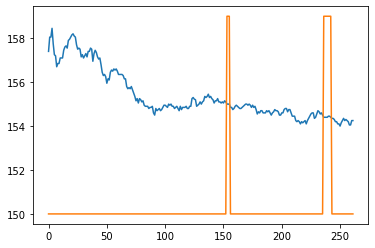

In [33]:
evaluate_trades(fil)
#fil['forslag'] = forslag
#px.line(fil, x='tid', y=['open', 'forslag'])
#plt.show()

In [9]:
px.line(fil, x='tid', y='open')

In [49]:
fil

,tid,open,close,high,low,volume,amount,close_-1_s,close_-1_d,rs_20,rsi_20,trix,open_8_sma,open_16_sma,macd,macds,macdh,sma8-16,forslag
0,9:0,44.95,44.95,44.95,44.95,44465,44465,NaN,NaN,NaN,NaN,NaN,44.95000,44.950000,0.000000,0.000000,0.000000,0.000000,0
1,9:1,44.74,44.74,44.74,44.74,12994,12994,44.95,-0.21,0.000000,0.000000,-0.074248,44.84500,44.845000,-0.004712,-0.002618,-0.002094,0.000000,0
2,9:2,44.65,44.65,44.65,44.65,18045,18045,44.74,-0.09,0.000000,0.000000,-0.066875,44.78000,44.780000,-0.008794,-0.005149,-0.003645,0.000000,0
3,9:3,44.51,44.51,44.51,44.51,8496,8496,44.65,-0.14,0.000000,0.000000,-0.067660,44.71250,44.712500,-0.015490,-0.008652,-0.006838,0.000000,0
4,9:4,44.80,44.80,44.80,44.80,3719,3719,44.51,0.29,0.735530,42.380699,-0.052258,44.73000,44.730000,-0.007263,-0.008239,0.000976,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,16:16,45.14,45.14,45.14,45.14,7885,7885,45.16,-0.02,0.626031,38.500558,-0.020387,45.13875,45.189375,-0.060831,-0.061292,0.000461,-0.050625,0
405,16:17,45.18,45.18,45.18,45.18,7805,7805,45.14,0.04,0.728685,42.152550,-0.019723,45.14250,45.183125,-0.055623,-0.060158,0.004536,-0.040625,0
406,16:18,45.00,45.00,45.00,45.00,80349,80349,45.18,-0.18,0.490283,32.898635,-0.020170,45.12375,45.163125,-0.065268,-0.061180,-0.004087,-0.039375,0
407,16:19,45.10,45.10,45.10,45.10,14158,14158,45.00,0.10,0.681609,40.533135,-0.020384,45.12125,45.151250,-0.064103,-0.061765,-0.002338,-0.030000,0
